# Creating Neural Networks with Scikit-Learn and Keras

CSC/DSC 340 Week 7 Slides (Part 2)

Author: [Dr. Julie Butler](www.juliebutler.org)

Date Created: September 28, 2023

Last Modified: September 28, 2023

## The Data Set

In this notebook, we will be attempting to use neural networks to classify the iris data set using both Scikit-Learn and Keras libraries

In [1]:
##############################
##          IMPORTS         ##
##############################
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
# Load the iris dataset from sklearn
iris = load_iris()

# Convert the iris dataset to a pandas dataframe
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target variable to the dataframe
iris_data['target'] = iris.target

/Users/butlerju/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


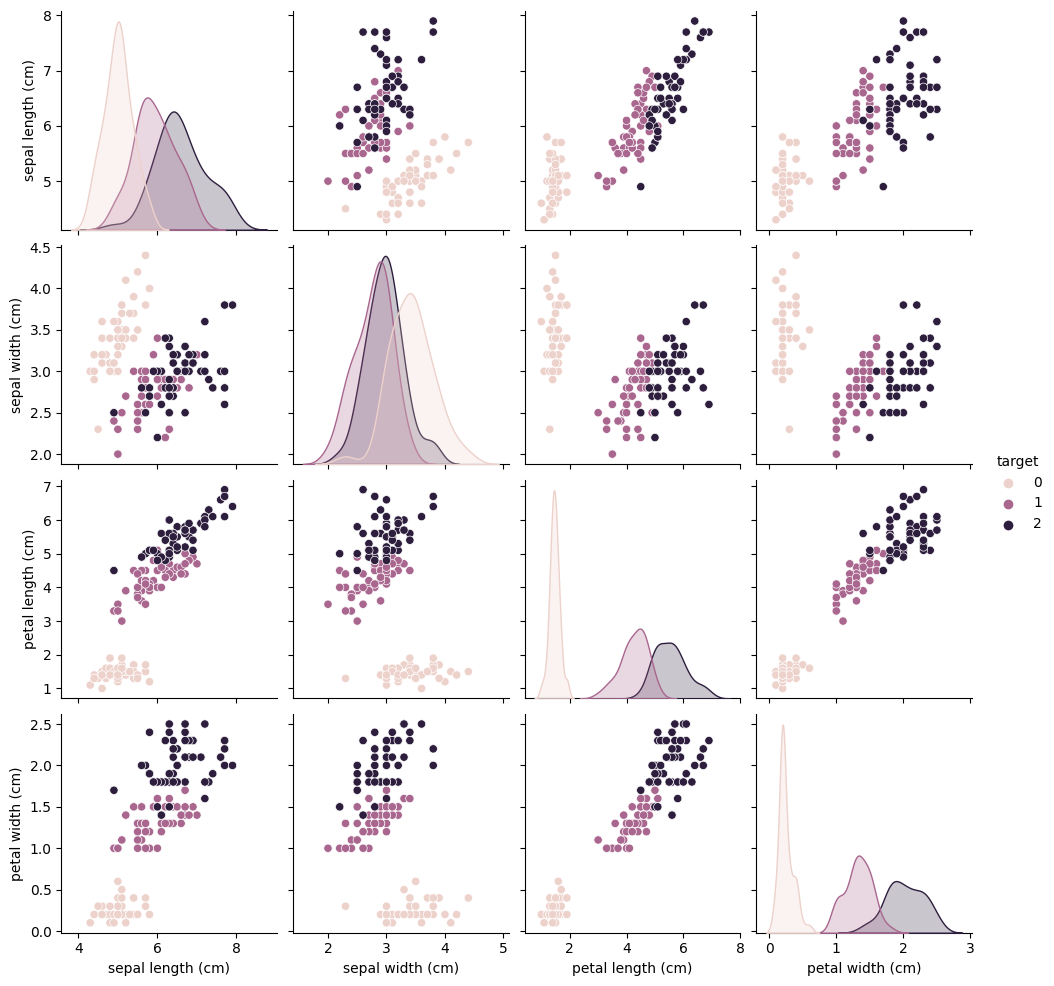

In [3]:
sns.pairplot(iris_data, hue='target')

## Neural Networks in Scikit-Learn with Hyperparameter Tuning

* Scikit-Learn does have neural network implementations but they are called `MLPClassifier` (for classification problems) and `MLPRegressor` (for regression problems).
* MLP stands for `multi-layer perceptron` and is another name for a simple feedforward neural network

In [40]:
##############################
##          IMPORTS         ##
##############################
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [39]:
# Load the Iris dataset
X,y = load_iris(return_X_y=True)

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

* Scaling/standardizing the data is optional with neural networks but its a good thing to test to optimize the performance
* Its also a good idea to explore PCA and feature engineering during this point of the notebook

In [7]:
# Standardize the feature values (mean=0, std=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

* Define the neural network with two hidden layers, the first having 3 neurons and the second having 2 neurons.
* The network will train for a maximum of 1,000 iterations or until the change between iterations is less than $1x10^{-4}$ (whichever happens first)
* Note that Scikit-Learn only allows for the activation function to be set for the entire network, not per layer
    * Rectified linear unit (ReLU) by default

In [8]:
# Create an MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(3, 2), max_iter=1000)

* Fit/train the neural network

In [9]:
# Train the classifier on the training data
mlp.fit(X_train, y_train)

/Users/butlerju/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(3, 2), max_iter=1000)

* Predict the classes with the trained model and test the accuracy of the trained model

In [10]:
# Predict the labels for the test set
y_pred = mlp.predict(X_test)

In [11]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5333333333333333


* We can also extract the probabilities for each category. The `predict_proba` method will return a list with a length equal to the number of points in the test set and the number of columns is equal to the number of classes.
* The column with the highest value for a point corresponds to the most likely class the point will belong to

In [12]:
# Predict the probabilities for the test set
probabilities = mlp.predict_proba(X_test)

In [13]:
# You can print the probabilities for the first few samples as an example
print("Probabilities for the first 5 samples:")
print(probabilities[:5])

Probabilities for the first 5 samples:
[[0.06029434 0.47087469 0.46883097]
 [0.06029434 0.47087469 0.46883097]
 [0.07513704 0.49996246 0.4249005 ]
 [0.06029434 0.47087469 0.46883097]
 [0.06029434 0.47087469 0.46883097]]


* Since `MLPClassifier` is a function within the Scikit-Learn library, its parameters can be tuned using `GridSearchCV` or `RandomizedSearchCV`

In [14]:
from sklearn.model_selection import RandomizedSearchCV

In [15]:
# Create an MLP classifier
mlp = MLPClassifier(max_iter=100000)

In [16]:
# Define a hyperparameter grid to search over
param_dist = {
    'hidden_layer_sizes': [(3,2), (3,3,3), (5,5,5), (2,2,2,2)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'alpha': np.logspace(-15,4,500),
    'learning_rate_init': np.logspace(-15,4,500),
}

In [17]:
# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=100, cv=5)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

/Users/butlerju/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/butlerju/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/butlerju/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/butlerju/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100000) reached and the optimization hasn't converged yet.
  warning

RandomizedSearchCV(cv=5, estimator=MLPClassifier(max_iter=100000), n_iter=100,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'alpha': array([1.00000000e-15, 1.09163173e-15, 1.19165984e-15, 1.30085370e-15,
       1.42005318e-15, 1.55017512e-15, 1.69222035e-15, 1.84728144e-15,
       2.01655104e-15, 2.20133111e-15, 2.40304289e-15, 2.62323788e-15,
       2.86360...
       1.33121590e+03, 1.45319752e+03, 1.58635653e+03, 1.73171713e+03,
       1.89039738e+03, 2.06361777e+03, 2.25271064e+03, 2.45913043e+03,
       2.68446481e+03, 2.93044698e+03, 3.19896892e+03, 3.49209598e+03,
       3.81208280e+03, 4.16139055e+03, 4.54270599e+03, 4.95896201e+03,
       5.41336030e+03, 5.90939590e+03, 6.45088409e+03, 7.04198979e+03,
       7.68725952e+03, 8.39165644e+03, 9.16059848e+03, 1.00000000e+04])})

In [18]:
# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'learning_rate_init': 0.0007581576457522118, 'hidden_layer_sizes': (3, 3, 3), 'alpha': 0.4563716281924773, 'activation': 'identity'}


In [19]:
# Get the best model
best_mlp = random_search.best_estimator_

# Predict the labels for the test set
y_pred = best_mlp.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


## Neural Networks in Keras
* Keras is a machine learning library which primarily handles various types of neural networks and provides greater flexibity in construction than Scikit-Learn
* Keras is built on top of another library called Tensorflow that we will learn about next week

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

/Users/butlerju/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [21]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [23]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
# Standardize the feature values (mean=0, std=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

* As an extra preprocessing step, we need to covert the data from categorical to binary vectors using the one-hot encoding processs and the Keras function `to_categorical`

In [25]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

* We are going to create a sequential model which will let us add layers from the first layer to the last in order

In [26]:
# Create a Sequential model
model = Sequential()

* Add the first hidden layer to the model with 8 neurons and a relu activation function
* We also have to set the input dimensio (4 in this case) when we add the first hudden layer to the model

In [27]:
# Add an input layer with 4 input nodes (features)
model.add(Dense(8, input_dim=4, activation='relu'))

* Add a second hidden layer with 8 neurons and a relu activation function

In [28]:
# Add a hidden layer with 8 nodes and ReLU activation
model.add(Dense(8, activation='relu'))

* Add a final layer (the output layer) which has the appropriate dimension (the number of classes with one-hot encoding) and a softmax activation function
* Softmax is a popular activation function for the output layer when doing classification
    * Gives probabilities and is useful in multiclass problems

In [29]:
# Add an output layer with 3 nodes (one for each class) and softmax activation
model.add(Dense(3, activation='softmax'))

* Compile the model using a categorical cross-entropy loss function, and Adam optimizer, and using accuracy as the training and prediction metric since this is a classification problem

In [30]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

* Fit/train the model using 100 training iterations
* `verbose = 1` prints the loss and accuracy per epoch

In [31]:
# Train the model
model.fit(X_train, y_train, epochs=100,verbose=1)

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.8906 - accuracy: 0.6250
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.8733 - accuracy: 0.6250
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.8570 - accuracy: 0.6250
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.8418 - accuracy: 0.6250
Epoch 5/100
4/4 [==============================] - 0s 977us/step - loss: 0.8268 - accuracy: 0.6333
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.8121 - accuracy: 0.6417
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7998 - accuracy: 0.6500
Epoch 8/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7863 - accuracy: 0.6583
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7742 - accuracy: 0.6667
Epoch 10/100
4/4 [==============================] - 0s 929us/step - loss: 0.7619 - accuracy: 0.6750
Epoch 11/100
4/4 [=======

* We can then evaluate the performance of the model, both in terms of loss (not particularly helpful unless you understand the loss function values) and in terms of the accuracy

In [32]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

1/1 [==============================] - 0s 59ms/step - loss: 0.1886 - accuracy: 0.9667
Test Loss: 0.18863752484321594
Test Accuracy: 0.9666666388511658


* It is relatively common to build the Keras model in a function that returns the model so the model is easy to edit and reuse

In [34]:
def iris_classification_model ():
    # Create a Sequential model
    model = Sequential()

    # Add an input layer with 4 input nodes (features)
    model.add(Dense(8, input_dim=4, activation='relu'))

    # Add a hidden layer with 8 nodes and ReLU activation
    model.add(Dense(8, activation='relu'))

    # Add an output layer with 3 nodes (one for each class) and softmax activation
    model.add(Dense(3, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

model = iris_classification_model()

# Train the model
model.fit(X_train, y_train, epochs=100,verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 1.2004 - accuracy: 0.3917
Epoch 2/100
4/4 [==============================] - 0s 964us/step - loss: 1.1747 - accuracy: 0.4417
Epoch 3/100
4/4 [==============================] - 0s 937us/step - loss: 1.1525 - accuracy: 0.4833
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 1.1298 - accuracy: 0.5167
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 1.1084 - accuracy: 0.5250
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 1.0884 - accuracy: 0.5250
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 1.0693 - accuracy: 0.5333
Epoch 8/100
4/4 [==============================] - 0s 927us/step - loss: 1.0501 - accuracy: 0.5417
Epoch 9/100
4/4 [==============================] - 0s 958us/step - loss: 1.0322 - accuracy: 0.5417
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 1.0144 - accuracy: 0.5500
Epoch 11/100
4/4 [===

* Having the model as a function allows hyperparameters to be passed as arguments which is useful for hyperparameter tuning

In [35]:
def iris_classification_model (neurons1, neurons2):
    # Create a Sequential model
    model = Sequential()

    # Add an input layer with 4 input nodes (features)
    model.add(Dense(neurons1, input_dim=4, activation='relu'))

    # Add a hidden layer with 8 nodes and ReLU activation
    model.add(Dense(neurons2, activation='relu'))

    # Add an output layer with 3 nodes (one for each class) and softmax activation
    model.add(Dense(3, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

* You can tune a Keras model using the for loop method

In [36]:
for neurons1 in range(1,6):
    for neurons2 in range(1,6):
        model = iris_classification_model(neurons1, neurons2)

        # Train the model
        model.fit(X_train, y_train, epochs=100,verbose=0)
        
        # Evaluate the model on the test set
        loss, accuracy = model.evaluate(X_test, y_test)
        print("Neurons:", neurons1, neurons2)
        print("Test Accuracy:", accuracy)
        print()

1/1 [==============================] - 0s 40ms/step - loss: 1.1178 - accuracy: 0.4667
Neurons: 1 1
Test Accuracy: 0.46666666865348816

1/1 [==============================] - 0s 40ms/step - loss: 0.7348 - accuracy: 0.6333
Neurons: 1 2
Test Accuracy: 0.6333333253860474

1/1 [==============================] - 0s 41ms/step - loss: 1.1030 - accuracy: 0.2667
Neurons: 1 3
Test Accuracy: 0.2666666805744171

1/1 [==============================] - 0s 43ms/step - loss: 1.1030 - accuracy: 0.2667
Neurons: 1 4
Test Accuracy: 0.2666666805744171

1/1 [==============================] - 0s 44ms/step - loss: 0.8486 - accuracy: 0.6333
Neurons: 1 5
Test Accuracy: 0.6333333253860474

1/1 [==============================] - 0s 41ms/step - loss: 0.7724 - accuracy: 0.6333
Neurons: 2 1
Test Accuracy: 0.6333333253860474

1/1 [==============================] - 0s 43ms/step - loss: 1.0671 - accuracy: 0.5333
Neurons: 2 2
Test Accuracy: 0.5333333611488342

1/1 [==============================] - 0s 40ms/step - loss: 0

* There are many ways to create Keras function for hyperaparameter tuning, some of which will be more general

In [48]:
# Define a function to create a Keras model
def create_model(hidden_layers=1, neurons=8, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, input_dim=4, activation='relu'))
    
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))
    
    model.add(Dense(3, activation='softmax'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

* Finally, we can also extract the probabilities from Keras the same way as Scikit-Learn

In [37]:
# Predict the probabilities for the test set
probabilities = model.predict(X_test)

# probabilities is a 2D array where each row corresponds to a sample in X_test
# and each column corresponds to the probability of that sample belonging to a specific class

# You can print the probabilities for the first few samples as an example
print("Probabilities for the first 5 samples:")
print(probabilities[:5])

1/1 [==============================] - 0s 42ms/step
Probabilities for the first 5 samples:
[[0.9644619  0.03330116 0.0022369 ]
 [0.02708035 0.32647318 0.64644647]
 [0.00750907 0.2402518  0.7522391 ]
 [0.950129   0.04601447 0.00385656]
 [0.9676701  0.03039231 0.00193762]]
